In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

from Model import Model

## 1. <a id='toc1_'></a>[ModelProject](#toc0_)

In the following program we will study a solow growth model in which workers with different skill levels are imperfect substitutes. We will analyse if economies with higher substitutability between high- and low skilled workers will have higher levels of capital, output and generally a higher share of skilled workers in steady state. To do so we will use a CES production function, so the elasticy of substitution between the two types of workers is constant.

## 2. <a id='toc1_'></a>[Model description](#toc0_)

In the model we will work with the following vairables and parameters.

 1. $K_t$ is capital. 
 2. $L_t^h$ is high skilled labor. 
 3. $L_t^l$ is low skilled labor. 
 4. $s_k$ is saving in capital. 
 5. $s_h$ is saving into more high skilled labor.
 6. $A_H$ is the technology used by high skilled labor.
 7. $A_L$ is the technology used by low skilled labor.
 8. $\delta$ is the deprecciation rate. We assume that capital and skilled labor depreciates at the same rate.
 9. $\alpha$ is share of capital in total output.
 10. $\psi$ is degree of substitution between skilled- and unskilled labor.

Small letter denote per capita values and $h_t$ is the share of skilled labor. 


*Genereal Production function* 
$$ Y_t  = F(K_t, A^h L_t^h, A^l L_t^l) $$ 
*Capital accumulation* 
$$ K_{t+1} = s_k F(\cdot)+(1-\delta)K_t $$ 
*Skilled labor accumulation* 
$$ L_{t+1}^H = s_h F(\cdot)+(1-\delta)L_t^h $$ 
*Capital accumulation per capita* 
$$ k_{t+1} = s_k f(\cdot) + (1-\delta)k_t $$ 
*Skilled labor accumulation per capita* 
$$ h_{t+1} = s_h f(\cdot) + (1-\delta)h_t $$ 
*CES production function* 
$$ Y_t = K_t^{\alpha}\left( (A^H L_t^H)^{\psi} +(A^L L_t^L)^{\psi}  \right)^{\frac{1-\alpha}{\psi}} $$
*CES production function per capita* 
$$ y_t = k_t^{\alpha}\left( (A^H h_t)^{\psi} +(A^L (1-h_t))^{\psi}  \right)^{\frac{1-\alpha}{\psi}} $$

Lav analytical solution med sympy

## 3. <a id='toc1_'></a>[Numerical Solution](#toc0_)

We start by defining the object model, which is the described Solow Model with both high and low skilled labor inputs. The described parameters are set to what we deem realistic values. We set psi manually as we later wish to illustrate how changing the parameter affects the steady state solution.

In [2]:
model = Model(alpha=0.3, s_k=0.3, s_h=0.25, s_m = 0.1, delta=0.1, A_H=1.0, A_L=0.8, theta = 0.5, eta = -0.5)

We then compute the steady state values for both capital and the share of skilled labor using the class method find_steady_state(). All the code needed to execute the solution can be found in the methods compute_equilibrium and find_steady_state in the .py file.

In [3]:
# Find and print steady states
k_init, h_init = 0.5, 0.3 # Initial values of capital and skilled labor share
k_ss, h_ss, y_ss = model.find_steady_state(k_init, h_init, psi = -0.45)

print(f'Steady state output per capita: {y_ss:.4f}')
print(f'Steady state capital per capita: {k_ss:.4f}')
print(f'Steady state skilled labor share: {h_ss:.4f}')

Steady state output per capita: 0.1472
Steady state capital per capita: 0.4416
Steady state skilled labor share: 0.3680


To visualize the steady state solution we plot the phase diagram of the model, which shows the two nullclines for $\Delta k = 0$ and $\Delta h = 0$ and their intercept.

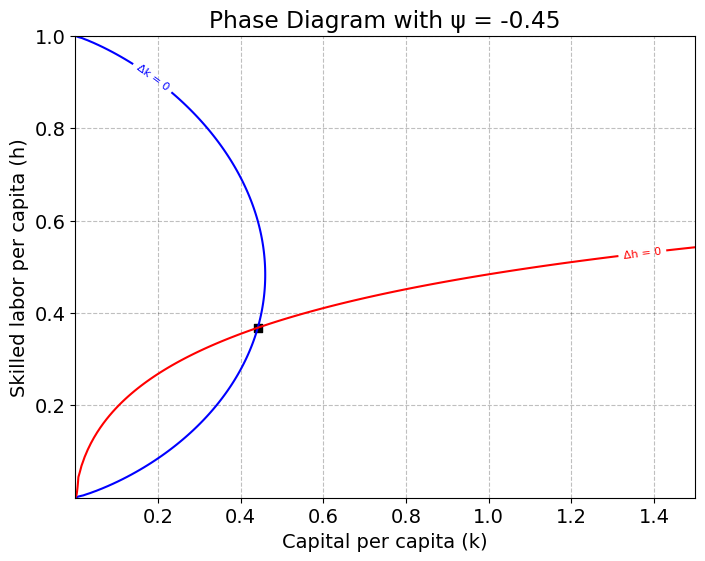

In [4]:
# Ranges for plot
k_range = np.linspace(1e-06, 1.5, 200) ; h_range = np.linspace(1e-06, 1, 200)

# Function to model the phase diagram
model.plot_phase_diagram(k_range, h_range, psi = -0.45)

By visual inspection the nullclines intersect at the calculated steady state.

## 4. <a id='toc1_'></a>[Different subsitution levels between high and low skilled labor](#toc0_)

We wish to show the long term impact on the economy from changing the parameter psi, i.e. how much the two types of labor can be substituted. We therefore solve and visualize the model for psi equal to both -0.6 and -0.75.

Steady state output per capita for psi = -0.6: 0.2211
Steady state capital per capita for psi = -0.6: 0.6634
Steady state skilled labor per capita for psi = -0.6: 0.5529


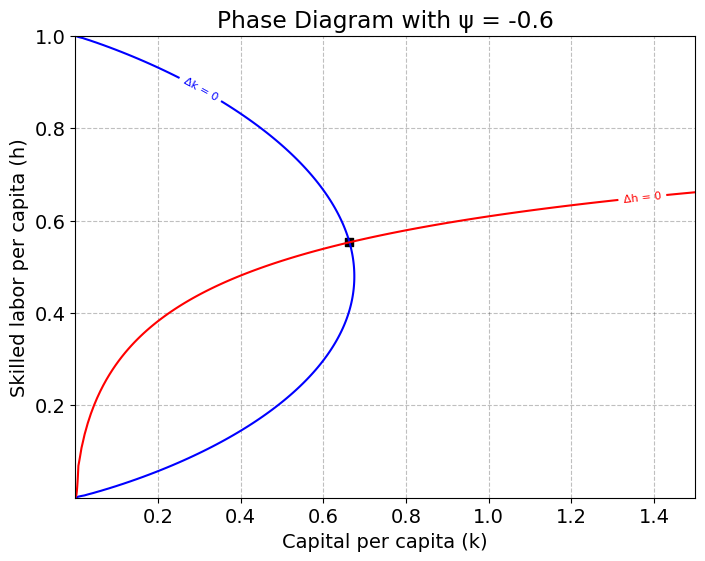

In [5]:
k_ss, h_ss, y_ss = model.find_steady_state(k_init, h_init, psi = -0.6)
model.plot_phase_diagram(k_range, h_range, psi = -0.6)

print(f'Steady state output per capita for psi = -0.6: {y_ss:.4f}')
print(f'Steady state capital per capita for psi = -0.6: {k_ss:.4f}')
print(f'Steady state skilled labor per capita for psi = -0.6: {h_ss:.4f}')


Steady state capital per capita for psi = -0.75: 0.2567
Steady state capital per capita for psi = -0.75: 0.7700
Steady state skilled labor per capita for psi = -0.75: 0.6417


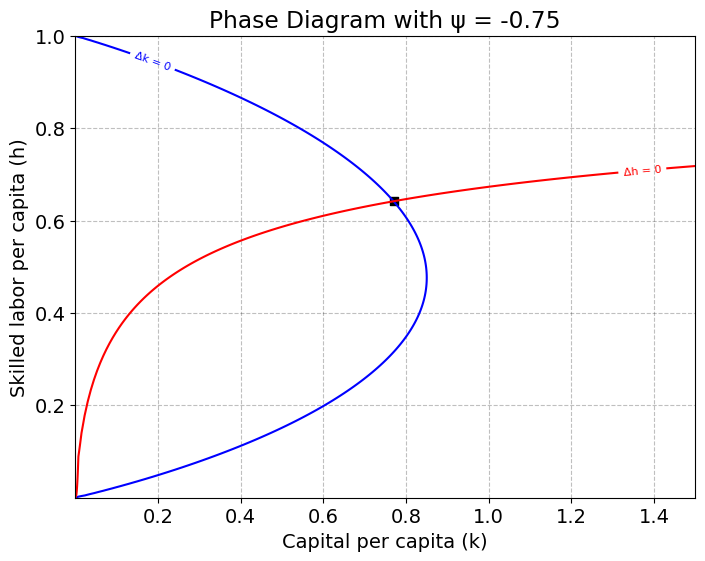

In [6]:
k_ss, h_ss, y_ss = model.find_steady_state(k_init, h_init, psi = -0.75)
model.plot_phase_diagram(k_range, h_range, psi = -0.75)
print(f'Steady state capital per capita for psi = -0.75: {y_ss:.4f}')
print(f'Steady state capital per capita for psi = -0.75: {k_ss:.4f}')
print(f'Steady state skilled labor per capita for psi = -0.75: {h_ss:.4f}')

From ealier we saw that capital per worker was 0.44 and output per worker was 0.15 for $\psi$ = -0.45. When decreasing $\psi$ to -0.6 we see an increase in capital per worker to 0.66 and output per worker to 0.22. Further decreasing $\psi$ to -0.75 a further increase in capital per worker to 0.77 and output per worker to 0.26 is achieved. 

We see the same tendency in the share of skilled workers where the share increases as $\psi$ decreases. In particular we have for $\psi$ at -0.45 then the share is 0.37, for $\psi$ at -0.6 the share is 0.55 and for $\psi$ at -0.75 the share is 0.64. The effects on the phasediagram from the parameter change is also shown.

The results therefore show that the less substitutability there is between high and low skilled labor there is, the more high skilled labor is accumulated and the larger capital and output per capita becomes.


## 5. <a id='toc1_'></a>[Extension: Adding a third labor input: High, medium and low skill labor in a Solow-model](#toc0_)

To extend the model we add a third type of labor input. This is done as a nested CES-function where non-high skilled labor is presented as a CES aggregrate. Theta measures their importance in the production while eta is substition between medium and low skilled labor. We extend the methods used earlier to accomodate for this.

In the extension we will add the following vairables and parameters.
 
 1. $L_t^m$ is medium skilled labor. 
 2. $s_m$ is savings into medium skilled labor. 
 3. $m_t$ is medium skilled labor share.
 4. $\eta$ is substitution between low and medium skilled workers.
 5. $\theta$ is the weight in production for low and medium skilled workers. 

We also add the following equations.

*CES production function*
$$ Y_t = K_t^{\alpha}((A^H L^H_t)^{\psi}+(A^L)^{\psi}(\Theta (L_t^M)^{\eta}+(1-\Theta)(L_t^l)^{\eta})^{\frac{\psi}{\eta}})^{\frac{1-\alpha}{\psi}} $$
*CES production function per capita*
$$ y_t = k_t^{\alpha}((A^H h_t)^{\psi}+(A^L(\Theta m_t^{\eta}+(1-\Theta)(1-h_t-m_t)^{\eta})^{\frac{1}{\eta}})^{\psi})^{\frac{1-\alpha}{psi}} $$
*Medium skilled labor accumulation* 
$$ L_{t+1}^M = s_m F(\cdot)+(1-\delta)L_t^M $$ 
$$ m_{t+1} = s_m f(\cdot) + (1-\delta)m_t $$ 

To see the effects of the extension we assume that medium and low skilled labor are equally used in production and more interchangabale with each other than with high skilled labor (i.e we set eta to -1.5 and theta to 0.5). We then solve the model with an initial 30 pct. high skilled labor and 50 pct. We set psi to the lowest of value, such that $\psi$ = -0.75.

In [7]:
k_init = 0.5 ; h_init = 0.3 ; m_init = 0.5

k_ss, h_ss, m_ss, y_ss = model.find_steady_state_ext(k_init, h_init, m_init, psi = -0.75)

print(f'Steady state capital per capita: {y_ss:.4f}')
print(f'Steady state capital per capita: {k_ss:.4f}')
print(f'Steady state high skilled labor per capita: {h_ss:.4f}')
print(f'Steady state medium skilled labor per capita: {m_ss:.4f}')

Steady state capital per capita: 0.1791
Steady state capital per capita: 0.5373
Steady state high skilled labor per capita: 0.4477
Steady state medium skilled labor per capita: 0.1791


In comparison with the earlier psi = -0.75 solution with only two labor inputs we see that both capital and output per worker is lower in this new configuration. Also high skilled labor is lower as a proportion of the labor force becomes medium skilled.